## Training SVM classifier on DD_bigram dataset

The first step is to read dataset from CSV file

In [19]:
import pandas as pd
from sklearn import preprocessing


#dd_dataset = pd.read_csv('./dataset/dd_pssm_dataset_improved.csv')
# Add separated dimers feature extraction

dd_dataset = pd.read_csv('./dataset/dd_separated_dimer_dataset.csv')

In [20]:
dd_dataset.head()

,Fold,Protein name,F1,F2,F3,F4,F5,F6,F7,F8,...,F391,F392,F393,F394,F395,F396,F397,F398,F399,F400
0,Globm-like(alpha),2LHB,790.757707,1399.278353,1160.903046,1304.446194,1148.844103,1226.536499,1366.709337,1065.270900,...,2047.411499,1932.648648,2066.643207,1873.608234,2128.992637,1479.646794,1791.508381,1855.162705,2256.788191,2113.393006
1,Globm-like(alpha),3SDHA,1858.069057,2583.822269,2225.255813,2541.743965,2282.452582,2314.731649,2645.835706,2127.373864,...,3049.226743,2721.848606,3233.938243,3030.218287,3116.204002,2971.653669,3084.973696,2660.943795,3197.603940,3105.250496
2,Globm-like(alpha),1FLP,7.155008,230.267735,162.175731,161.391631,158.688111,219.089868,183.232620,253.579903,...,456.046522,442.254578,488.554104,476.692630,503.492418,407.816526,454.116052,441.108208,511.866271,512.277052
3,Globm-like(alpha),2HBG,366.744441,404.682260,359.577480,419.468181,374.871212,469.008454,321.988257,310.432062,...,780.581804,815.827219,816.061810,789.845319,831.392548,714.711919,823.400724,678.371956,831.392548,832.072321
4,Globm-like(alpha),2MGE,2742.199430,3507.138537,3380.188979,2845.115945,3185.902917,3051.498448,3128.557751,3184.984844,...,4284.268445,4235.922465,4173.931347,4061.108912,4149.400413,4094.231864,4094.404959,3879.324727,4143.189527,4180.038029


Convert class lables to unique integers

In [21]:
# Encode class labels
#from sklearn.preprocessing import LabelEncoder

y_true, labels = pd.factorize(dd_dataset.Fold)
dd_dataset.insert(1, 'class labels', y_true)

In [14]:
dd_dataset.head()

,Fold,class labels,Protein name,F1,F2,F3,F4,F5,F6,F7,...,F391,F392,F393,F394,F395,F396,F397,F398,F399,F400
0,Globm-like(alpha),0,2LHB,790.757707,1399.278353,1160.903046,1304.446194,1148.844103,1226.536499,1366.709337,...,2047.411499,1932.648648,2066.643207,1873.608234,2128.992637,1479.646794,1791.508381,1855.162705,2256.788191,2113.393006
1,Globm-like(alpha),0,3SDHA,1858.069057,2583.822269,2225.255813,2541.743965,2282.452582,2314.731649,2645.835706,...,3049.226743,2721.848606,3233.938243,3030.218287,3116.204002,2971.653669,3084.973696,2660.943795,3197.603940,3105.250496
2,Globm-like(alpha),0,1FLP,7.155008,230.267735,162.175731,161.391631,158.688111,219.089868,183.232620,...,456.046522,442.254578,488.554104,476.692630,503.492418,407.816526,454.116052,441.108208,511.866271,512.277052
3,Globm-like(alpha),0,2HBG,366.744441,404.682260,359.577480,419.468181,374.871212,469.008454,321.988257,...,780.581804,815.827219,816.061810,789.845319,831.392548,714.711919,823.400724,678.371956,831.392548,832.072321
4,Globm-like(alpha),0,2MGE,2742.199430,3507.138537,3380.188979,2845.115945,3185.902917,3051.498448,3128.557751,...,4284.268445,4235.922465,4173.931347,4061.108912,4149.400413,4094.231864,4094.404959,3879.324727,4143.189527,4180.038029


Create a training set from pandas data frame

In [22]:
train_data = dd_dataset[['F%d' % i for i in range(1,401)]].values

# Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

Number of samples: 311, Number of features: 400


In [23]:
# Show normlaized data

train = pd.DataFrame(train_data)

train.head()


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.057130,0.091811,0.083254,0.091509,0.082097,0.090021,0.091792,0.075247,0.073544,0.078635,...,0.131958,0.142329,0.147135,0.126612,0.143011,0.101223,0.135952,0.132082,0.147492,0.142289
1,0.134240,0.169532,0.159583,0.178307,0.163105,0.169888,0.177702,0.150270,0.149614,0.140821,...,0.196527,0.200449,0.230241,0.204772,0.209325,0.203291,0.234110,0.189451,0.208978,0.209068
2,0.000517,0.015109,0.011630,0.011322,0.011340,0.016080,0.012306,0.017912,0.014225,0.008147,...,0.029393,0.032570,0.034783,0.032213,0.033821,0.027899,0.034462,0.031406,0.033453,0.034490
3,0.026496,0.026552,0.025787,0.029426,0.026788,0.034423,0.021626,0.021928,0.015344,0.024449,...,0.050310,0.060081,0.058100,0.053375,0.055847,0.048894,0.062486,0.048298,0.054335,0.056021
4,0.198116,0.230113,0.242408,0.199589,0.227666,0.223963,0.210123,0.224976,0.177326,0.199429,...,0.276127,0.311953,0.297164,0.274436,0.278727,0.280087,0.310713,0.276196,0.270777,0.281430


## Data analysis

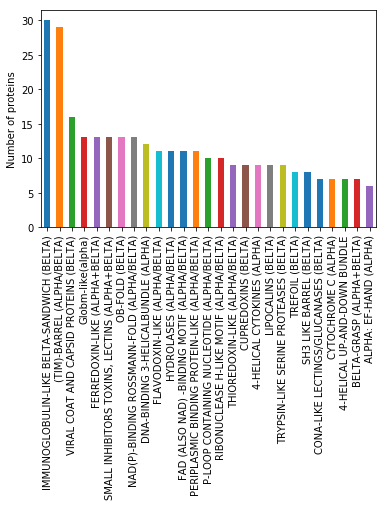

In [25]:
# Frequency of folds
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
freq_plot = dd_dataset['Fold'].value_counts().plot(ax=ax, kind='bar')
freq_plot.set_ylabel('Number of proteins')
plt.show()

## SVM classifier

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

# An instance of SVM classifier
svm_cl = SVC(kernel=kernel)

Define range of parameters for Grid Search

In [29]:
# Penalty parameter
c_range = {'C': [float(2**i) for i in range(-14, 14)]}
# Gamma parameter for RBF kernel
gamma_range = {'gamma': [float(2**i) for i in range(-14, 14)]} if kernel == 'rbf' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 10
n_workers = -1 # Number of CPU threads

result = GridSearchCV(svm_cl, param_range, cv=cv_fold, n_jobs=n_workers, refit=True,
                      verbose=1)

Start grid search!

In [30]:
result.fit(train_data, y_true)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits


C:\Users\Mir\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 7192 t

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0], 'gamma': [6.103515625e-05, 0.0...25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best results

In [31]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 32.48


Confusion matrix

Accuracy:  85.20900321543408


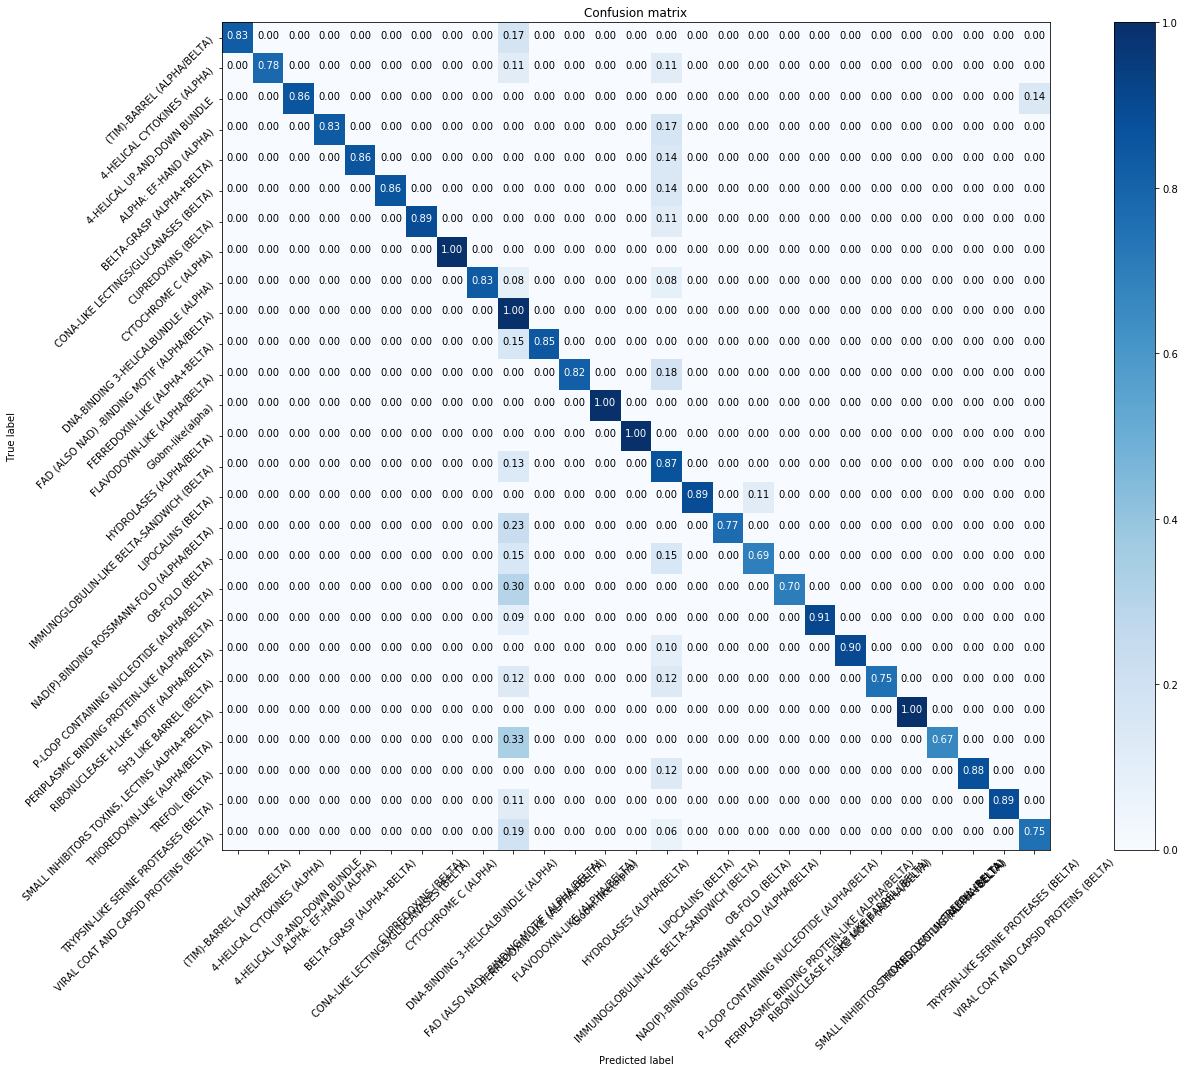

In [37]:
from misc import plt_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

y_pred = result.best_estimator_.predict(train_data)

cm = confusion_matrix(labels[y_true], labels[y_pred])

print("Accuracy: ", (accuracy_score(labels[y_true], labels[y_pred]) * 100))

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(labels[y_true]))
plt.savefig("./report/DD_confusion_matrix.png", dpi=256)

Classification report

In [34]:
print(classification_report(labels[y_true], labels[y_pred]))

                                                precision    recall  f1-score   support

                    (TIM)-BARREL (ALPHA/BELTA)       1.00      0.83      0.91        29
                   4-HELICAL CYTOKINES (ALPHA)       1.00      0.78      0.88         9
                  4-HELICAL UP-AND-DOWN BUNDLE       1.00      0.86      0.92         7
                        ALPHA: EF-HAND (ALPHA)       1.00      0.83      0.91         6
                     BELTA-GRASP (ALPHA+BELTA)       1.00      0.86      0.92         7
         CONA-LIKE LECTINGS/GLUCANASES (BELTA)       1.00      0.86      0.92         7
                           CUPREDOXINS (BELTA)       1.00      0.89      0.94         9
                          CYTOCHROME C (ALPHA)       1.00      1.00      1.00         7
           DNA-BINDING 3-HELICALBUNDLE (ALPHA)       1.00      0.83      0.91        12
   FAD (ALSO NAD) -BINDING MOTIF (ALPHA/BELTA)       0.27      1.00      0.42        11
                 FERREDOXIN-LIK

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create Dmatrix for more performance 
data_matrix = xgb.DMatrix(data=train_data,label=labels)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=123)

In [ ]:
# Instantitate an XGBosst Classifier
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)


In [ ]:
# Fit the classifier to the training set
xg_clf.fit(X_train,y_train)

# Predit test data
preds = xg_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)

In [ ]:
print("Best accuracy: %.2f" % (accuracy*100))
